In [803]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)
import warnings
warnings.filterwarnings(action = 'ignore')

## 피마 인디언 당뇨병 머신러닝 예측 모델을 수립하고, 평가 지표 적용

## 1. 데이터 로드 후 분포와 데이터 확인

In [804]:
import pandas as pd 
diabets = pd.read_csv('../data/228_482_bundle_archive/diabetes.csv')
diabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 당뇨병에 걸린 사람과 아닌 사람의 수는?

In [805]:
diabets.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## 3. feature 의 타입과 Null 개수를 살펴보시오.

In [806]:
diabets.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [807]:
diabets.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [808]:
y = diabets['Outcome']
X = diabets.drop(columns='Outcome')
#X = X.drop(columns='Insulin')

## 4.로지스틱 회귀를 이용해 예측 모델을 생성해 보세요.

In [809]:
from sklearn.model_selection import train_test_split

def grid_search_LR(X,y):
    X = np.log1p(X)
    X_trainval, X_test, y_trainval, y_test=  train_test_split(X, y, stratify = y, random_state=0)
    X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, stratify = y_trainval, random_state=0)
    
    param_grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 100]}
    print("매개변수 그리드: \n",param_grid)
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5,return_train_score=True)

    grid_search.fit(X_train,y_train)
    pred_Log_grid = grid_search.predict(X_test)

    print("트레인 세트 점수 : {:.2f}".format(grid_search.score(X_train,y_train)))
    print("검증 세트 점수 : {:.2f}".format(grid_search.score(X_trainval,y_trainval)))
    print("테스트 세트 점수 : {:.2f}".format(grid_search.score(X_test,y_test)))
    print("최적 매개변수:",grid_search.best_params_)
    print("최고 교차 검증 점수:",grid_search.best_score_)
    print("최고 성능 모델:",grid_search.best_estimator_)
    return X_test,y_test, pred_Log_grid, grid_search

In [810]:
X_test,y_test, pred_Log_grid, grid_search = grid_search_LR(X, y)

매개변수 그리드: 
 {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100]}
트레인 세트 점수 : 0.75
검증 세트 점수 : 0.76
테스트 세트 점수 : 0.73
최적 매개변수: {'C': 100}
최고 교차 검증 점수: 0.7384259259259259
최고 성능 모델: LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


## 4.1 get_clf_eval 오차행렬, 정확도, 정밀도, 재현율 구하기 

In [811]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))
    return precision, recall

In [812]:
precision, recall = get_clf_eval(y_test, pred_Log_grid)

오차 행렬
[[112  13]
 [ 39  28]]
정확도: 0.7292, 정밀도: 0.6829, 재현율: 0.4179


## 4.2 precision_recall_curve_plot()

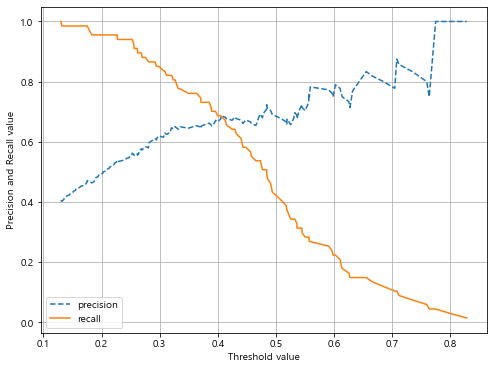

In [813]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, grid_search.predict_proba(X_test)[:, 1] )


* 그래프로 임계치의 적정선을 확인해보았을 때 0.39~0.45(추정) 에서 정밀도와 재현율의 차이가 적다. 
* get_eval_by_threshold 매써드로, 해당 임계치의 정확한 정밀도와 재현율 파악해보기

## 4.3 get_eval_by_threshold

In [814]:
from sklearn.preprocessing import StandardScaler, Binarizer
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    min = 3
    for i in thresholds:
        binarizer = Binarizer(threshold=i).fit(pred_proba)
        custom_predict = binarizer.transform(pred_proba)
        print('\n임계값: ', i)
        precision, recall = get_clf_eval(y_test, custom_predict)
        if min > abs(precision - recall):
            min = abs(precision - recall)
            best_precision = precision
            best_recall = recall
            best_threshhold = i 
    print('\n최적의 임계값 : %.4f, 정밀도 : %.4f, 재현율 : %.4f'%(best_threshhold,best_precision, best_recall))
        
thresholds = np.arange(0.38, 0.45, 0.01)
print('thresholds value list : ', thresholds)
pred_proba = grid_search.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

thresholds value list :  [0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45]

임계값:  0.38
오차 행렬
[[100  25]
 [ 18  49]]
정확도: 0.7760, 정밀도: 0.6622, 재현율: 0.7313

임계값:  0.39
오차 행렬
[[101  24]
 [ 20  47]]
정확도: 0.7708, 정밀도: 0.6620, 재현율: 0.7015

임계값:  0.4
오차 행렬
[[103  22]
 [ 21  46]]
정확도: 0.7760, 정밀도: 0.6765, 재현율: 0.6866

임계값:  0.41000000000000003
오차 행렬
[[104  21]
 [ 22  45]]
정확도: 0.7760, 정밀도: 0.6818, 재현율: 0.6716

임계값:  0.42000000000000004
오차 행렬
[[104  21]
 [ 24  43]]
정확도: 0.7656, 정밀도: 0.6719, 재현율: 0.6418

임계값:  0.43000000000000005
오차 행렬
[[105  20]
 [ 25  42]]
정확도: 0.7656, 정밀도: 0.6774, 재현율: 0.6269

임계값:  0.44000000000000006
오차 행렬
[[105  20]
 [ 27  40]]
정확도: 0.7552, 정밀도: 0.6667, 재현율: 0.5970

임계값:  0.45000000000000007
오차 행렬
[[106  19]
 [ 29  38]]
정확도: 0.7500, 정밀도: 0.6667, 재현율: 0.5672

최적의 임계값 : 0.4000, 정밀도 : 0.6765, 재현율 : 0.6866


## 임계값이 약 0.4 일때 정밀도와 재현율의 차이가 크지않지만, 정밀도와 재현율이 높지않아 모델에 입력될 데이터를 좀더 손본다.  


## 5. 피쳐들의 분포도를 확인해보기 

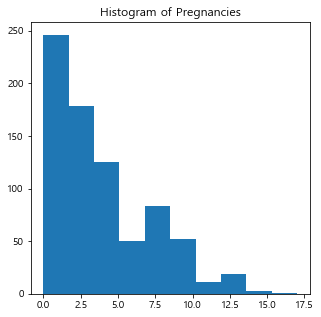

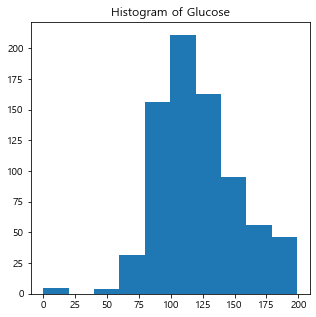

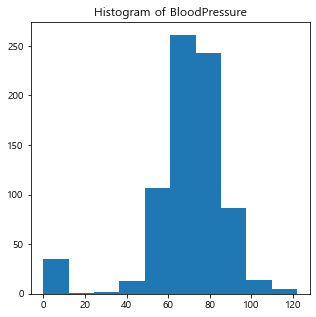

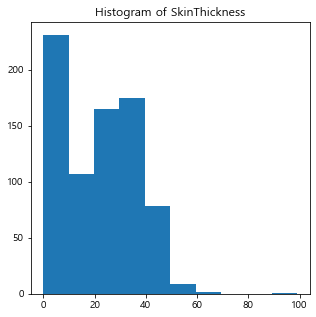

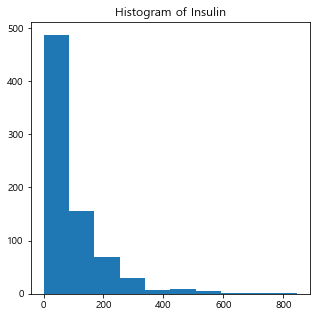

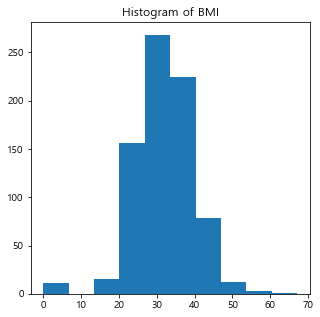

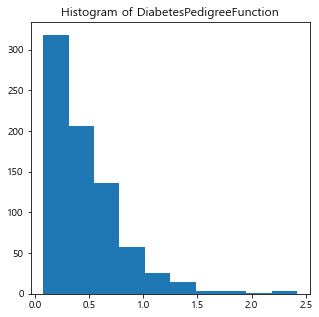

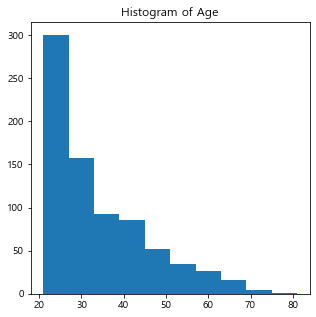

In [815]:
X_column_list = X.columns
def get_hist(data):
    for i in X_column_list:
        ax = plt.figure(figsize=(5,5))
        ax = plt.hist(X[i])
        ax = plt.title('Histogram of '+i)
        ax
get_hist(X)

## 각 컬럼별, 0이 들어간 데이터 확인하기.

In [816]:
def get_per_of_Zero(X):
        df = pd.DataFrame(index=X.columns, columns={'count', 'per'})
        for i in X.columns:
            df.loc[i]['count'] = X[X[i]==0].shape[0]
            df.loc[i]['per'] = str(np.round(X[X[i]==0].shape[0]/X.shape[0] *100,2))+'%'
        print(df)

In [817]:
get_per_of_Zero(X)

                         count     per
Pregnancies                111  14.45%
Glucose                      5   0.65%
BloodPressure               35   4.56%
SkinThickness              227  29.56%
Insulin                    374   48.7%
BMI                         11   1.43%
DiabetesPedigreeFunction     0    0.0%
Age                          0    0.0%


* 각 컬럼별, 0의 값이 들어간 데이터가 너무 많아(특히나 Insulin, SkinThickness) 실질적으로 모델링에 좋지않은 셋 형태이므로, 우선적으로는 각 컬럼별로, 나이대에 비교하여 median으로 수치화해주어본다. 
* 추가 - insulin는 사람마다 0의 수치가 들어갈 때도 있다고 한다..! - 따라서 median값으로 대체될 컬럼에서 제외해본다!

In [818]:
X = X.drop(columns='Insulin')
Age_relist = []
for i in X['Age']:
    Age_relist.append(i//10)
X['Age'] = Age_relist
median_df = pd.DataFrame(X.groupby('Age').median())

* 먼저, 예를 들어 53세를 5, 24세를 2와 같이 수치화 해줘서 범주형 변수로 지정해준 다음, 해당 'Age' 컬럼을 기준으로 그룹화 하여, 모든 컬럼의 median 값을 저장하는 데이터 프레임을 만든다. 

In [819]:
for x in X.columns:
    for y in X[X[x]==0].index:
        if X.loc[y]['Age'] in median_df.index:
            median_data = median_df.loc[X.loc[y]['Age']][x]
            X.loc[y,x]= median_data

* 수치화된 'Age'컬럼이 있는 기존 데이터 셋에서, 데이터포인트가 0인 컬럼을 median 데이터 프레임의 'Age'와 비교하여 컬럼의 '0'data를 나이별 median값으로 대체한다. 

In [820]:
X['Insulin'] = diabets['Insulin']

In [821]:
get_per_of_Zero(X)

                         count    per
Pregnancies                  0   0.0%
Glucose                      0   0.0%
BloodPressure                0   0.0%
SkinThickness               18  2.34%
BMI                          0   0.0%
DiabetesPedigreeFunction     0   0.0%
Age                          0   0.0%
Insulin                    374  48.7%


* median 값으로 대체하였음이도, SkinThickness 컬럼의 '0' 데이터가 존재한다. 정확한 의학적 지식이 없어 0이어도 되는 수치인지는 모르기 때문에, 해당컬럼에는 다른 컬럼과 비교하여 대체해줄 값이 있는지 확인해본다. 

In [822]:
median_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction
Age,,,,,,
2,2.0,109.0,68.0,23.0,31.20,0.3655
3,5.0,122.0,74.0,22.0,32.00,0.4200
4,7.0,122.5,76.0,25.0,33.95,0.3330
5,7.0,139.0,78.0,21.0,32.80,0.4520
6,5.0,136.0,78.0,0.0,28.80,0.4190
7,3.0,132.0,41.0,9.0,26.05,0.5335
8,9.0,134.0,74.0,33.0,25.90,0.4600


* age(범주화한)별로 각 컬럼의 median값을 구분 하였을때, 60대에서의 SkinThickness 컬럼의 median 수치가 0으로 나왔다. 이럴땐 어떤 값을 대처해줘야하나..? -> 더고민해보기

In [823]:
y = diabets['Outcome']
X_test,y_test, pred_Log_grid, grid_search = grid_search_LR(X, y)

매개변수 그리드: 
 {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100]}
트레인 세트 점수 : 0.78
검증 세트 점수 : 0.77
테스트 세트 점수 : 0.78
최적 매개변수: {'C': 100}
최고 교차 검증 점수: 0.7754629629629629
최고 성능 모델: LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### 테스트셋 점수가 오르긴 했으니 다시 성능평가 지표를 출력

In [824]:
get_clf_eval(y_test, pred_Log_grid)

오차 행렬
[[112  13]
 [ 29  38]]
정확도: 0.7812, 정밀도: 0.7451, 재현율: 0.5672


(0.7450980392156863, 0.5671641791044776)

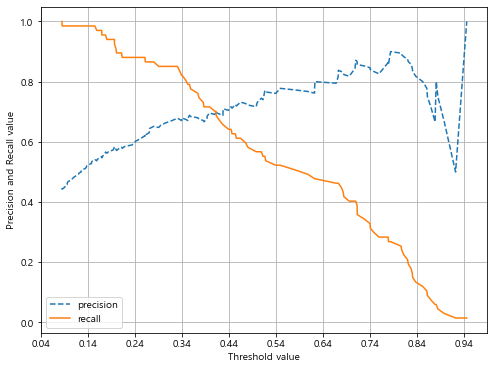

In [825]:
precision_recall_curve_plot(y_test, grid_search.predict_proba(X_test)[:, 1] )

### 마찬가지로, 0.35~0.45 임계치 사이에서 정밀도와 재현율의 차이가 가장 적으니, 해당 범위내 임계값에서의 정확한 수치를 분석해본다. 

In [826]:
thresholds = np.arange(0.35, 0.45, 0.01)
print('thresholds value list : ', thresholds)
pred_proba = grid_search.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

thresholds value list :  [0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45]

임계값:  0.35
오차 행렬
[[99 26]
 [14 53]]
정확도: 0.7917, 정밀도: 0.6709, 재현율: 0.7910

임계값:  0.36
오차 행렬
[[101  24]
 [ 16  51]]
정확도: 0.7917, 정밀도: 0.6800, 재현율: 0.7612

임계값:  0.37
오차 행렬
[[101  24]
 [ 16  51]]
정확도: 0.7917, 정밀도: 0.6800, 재현율: 0.7612

임계값:  0.38
오차 행렬
[[101  24]
 [ 18  49]]
정확도: 0.7812, 정밀도: 0.6712, 재현율: 0.7313

임계값:  0.39
오차 행렬
[[102  23]
 [ 19  48]]
정확도: 0.7812, 정밀도: 0.6761, 재현율: 0.7164

임계값:  0.4
오차 행렬
[[104  21]
 [ 20  47]]
정확도: 0.7865, 정밀도: 0.6912, 재현율: 0.7015

임계값:  0.41000000000000003
오차 행렬
[[104  21]
 [ 20  47]]
정확도: 0.7865, 정밀도: 0.6912, 재현율: 0.7015

임계값:  0.42000000000000004
오차 행렬
[[105  20]
 [ 23  44]]
정확도: 0.7760, 정밀도: 0.6875, 재현율: 0.6567

임계값:  0.43000000000000005
오차 행렬
[[107  18]
 [ 24  43]]
정확도: 0.7812, 정밀도: 0.7049, 재현율: 0.6418

임계값:  0.44000000000000006
오차 행렬
[[108  17]
 [ 24  43]]
정확도: 0.7865, 정밀도: 0.7167, 재현율: 0.6418

임계값:  0.45000000000000007
오차 행렬
[[109  16]
 [ 25  42]]
정확도: 0.7865, 정밀도:

###  1. 데이터셋 정제 전의 최적의 성능 분석 결과: 최적의 임계값 : 
#### - 인슐린 컬럼을 넣었을 때 : 최적의 임계값 : 0.4000, 정밀도 : 0.6765, 재현율 : 0.6866 
* LogisticRegression - 트레인 세트 점수 : 0.75, 검증 세트 점수 : 0.76, 테스트 세트 점수 : 0.74

#### - 인슐린 컬럼을 뺏을 때  : 최적의 임계값 : 0.4200, 정밀도 : 0.6667, 재현율 : 0.6567
*  LogisticRegression - 트레인 세트 점수 : 0.75, 검증 세트 점수 : 0.76, 테스트 세트 점수 : 0.74
 
### 2. '0' 데이터포인트를 age간의 median값으로 대체해준 결과 : 
#### - 인슐린 컬럼을 넣었을 때 : 최적의 임계값 : 0.4000, 정밀도 : 0.6912, 재현율 : 0.7015
* LogisticRegression -트레인 세트 점수 : 0.78, 검증 세트 점수 : 0.77, 테스트 세트 점수 : 0.78 

#### - 인슐린 컬럼을 뺏을 때  : 최적의 임계값 : 0.4200, 정밀도 : 0.6818, 재현율 : 0.6716
* LogisticRegression -트레인 세트 점수 : 0.78, 검증 세트 점수 : 0.78, 테스트 세트 점수 : 0.77




### 크지는 않지만, 정밀도와 재현율에서 확실한 차이를 보여주고 있기 때문에 정제후 데이터를 입력한 모델(Insulin 포함)에 대해 임계값 0.40로 성능 분석을 해보자!

## f1_score, roc_curve, AUC

In [827]:
from sklearn.metrics import classification_report
print('로지스틱 회귀 모델의 classification_report:\n ',classification_report(y_test, pred_Log_grid, target_names =['1', '0']))

로지스틱 회귀 모델의 classification_report:
               precision    recall  f1-score   support

          1       0.79      0.90      0.84       125
          0       0.75      0.57      0.64        67

avg / total       0.78      0.78      0.77       192



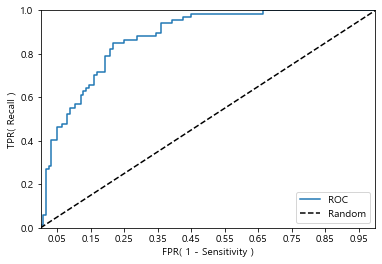

In [828]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, grid_search.predict_proba(X_test)[:, 1] )


In [829]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("LogisticRegression의 AUC: {:.4f}".format(rf_auc))


LogisticRegression의 AUC: 0.8744
